In [4]:
import rasterio as ro

In [5]:
dataset = ro.open('raster/Letch.tif')

In [6]:
dataset.name

'raster/Letch.tif'

In [7]:
dataset.count

4

In [8]:
dataset.mode

'r'

In [9]:
dataset.width #pixel count

5968

In [10]:
dataset.bounds #geocrs

BoundingBox(left=253683.0, bottom=4723056.0, right=259651.0, top=4730778.0)

In [11]:
dataset.height

7722

In [12]:
dataset.crs

CRS.from_dict(init='epsg:26918')

In [13]:
dataset.res

(1.0, 1.0)

In [14]:
band1 = dataset.read(1)

In [15]:
band1

array([[ 52,  49,  51, ...,  64,  75,  82],
       [ 50,  51,  53, ...,  66,  77,  76],
       [ 53,  51,  48, ...,  69,  66,  63],
       ...,
       [ 31,  37,  38, ...,  85, 103, 121],
       [ 34,  37,  38, ...,  89, 101, 107],
       [ 35,  36,  41, ...,  93,  96,  96]], dtype=uint8)

In [16]:
band1[0,0]

52

In [17]:
dataset.transform

Affine(1.0, 0.0, 253683.0,
       0.0, -1.0, 4730778.0)

In [18]:
dataset.transform * (0,0) # retrieve the x,y by row and column indice

(253683.0, 4730778.0)

In [19]:
dataset.bounds

BoundingBox(left=253683.0, bottom=4723056.0, right=259651.0, top=4730778.0)

In [20]:
x,y = (dataset.bounds.left + 5000, dataset.bounds.top - 5000) # each pixel represent 1 m , so we actually move 5000 pixels to right
row, col = dataset.index(x,y) # retrieve the row and column by x,y;the returning result shoulbe be tuple

In [21]:
col

5000

In [22]:
from rasterio.plot import show

In [23]:
show(dataset.read())

<Figure size 640x480 with 1 Axes>

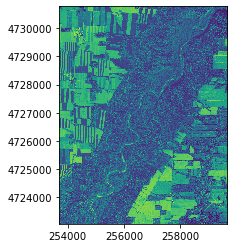

In [24]:
show((dataset,1)) #result from the 1st band

AttributeError: 'builtin_function_or_method' object has no attribute 'shape'

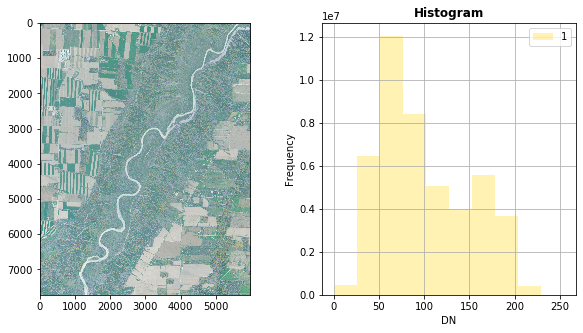

In [25]:
import matplotlib.pyplot as plt
fig, (axiamge, axhist) = plt.subplots(1,2,figsize=(10,5))
show(dataset.read(),ax=axiamge)
from rasterio.plot import show_hist
show_hist(dataset.read(1),bins = 10, histtype = 'stepfilled',alpha = 0.3, ax = axhist)#plot the hist of band 1 of the image
show_hist(dataset.read,bins = 10, histtype = 'stepfilled',alpha = 0.3, ax = axhist)

In [ ]:
red = dataset.read(1)
green = dataset.read(2)
blue = dataset.read(3)
nir = dataset.read(4) #近红外

In [ ]:
red

In [ ]:
import numpy as np

ngb = np.dstack((nir,green,blue))

import matplotlib.pyplot as plt

plt.imshow(ngb) #different to show()

In [ ]:
new_band = np.random.randint(255,size = (dataset.height,dataset.width))

In [ ]:
new_bandw = new_band.astype(dataset.read(1).dtype)

In [ ]:

new_dataset = ro.open("new_raster.tif","w",driver="GTIFF",
                     width= dataset.width,
                     height=dataset.height,
                     count= 1,
                     dtype= new_band.dtype,
                     crs= dataset.crs,
                     transform = dataset.transform)

In [ ]:
new_dataset.write(new_band,1)#write 1st band
new_dataset.close()

In [ ]:
from rasterio.plot import show 
new_dataset = ro.open("./new_raster.tif")
show(new_dataset.read())

In [ ]:
#create two lists, x is one-dimension array
x = np.linspace(-4.0,4.0,240)
y = np.linspace(3.0,-3.0,180)

In [ ]:
#create meshgrid, Return coordinate matrices from coordinate vectors,x_mesh is two dimension array
x_mesh,y_mesh = np.meshgrid(x,y)

In [ ]:
z = np.exp(-2 * np.log(2) * ((x_mesh-0.5) ** 2 +(y_mesh - 0.5) ** 2) / 1 ** 2)

In [ ]:
 #last one - first one, and then divideed by 240
res = (x[-1]-x[0])/240

In [ ]:
from rasterio.transform import Affine

In [ ]:
transform = Affine.translation(x[0]+res/2,y[0]-res/2)*Affine.scale(res,res)

In [ ]:
(0,0)*transform

In [ ]:
new_dataset2 = ro.open("new_raster2.tif","w",driver="GTIFF",
                       width=240,
                       height=180,
                       count= 1,
                       transform=transform,
                       dtype=z.dtype)
new_dataset2.write(z,1)
new_dataset2.close() # when we delete crs information, it worked. the crs we need to set is {'init':'epsg:4326'}

In [ ]:
new_dataset2 = ro.open("./new_raster2.tif")
show(new_dataset2.read())

In [ ]:
import pyproj
pyproj.Proj({'init':'epsg:4326'})